In [1]:
import csv
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import numpy as np
import h5py
from skimage import transform
from matplotlib.pyplot import imshow
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
dataSrc = "data/"
imageSrc = "data/ImageData/"

trainCSV = dataSrc + "train_image.csv"
testCSV = dataSrc + "test_image.csv"

trainData = pd.read_csv(trainCSV,header="infer",sep=',')
testData = pd.read_csv(testCSV,header="infer",sep=',')

In [3]:
TrainH5 = h5py.File(dataSrc + "train.h5", "w")
TestH5 = h5py.File(dataSrc + "test.h5", "w")

In [4]:
totalTrainNum = len(trainData)
img_size = 224
img_channel = 3

trainImage = np.zeros([totalTrainNum,img_size,img_size,img_channel])
trainCsr = np.zeros([totalTrainNum,7,1])
trainY = np.zeros([totalTrainNum,1])

totalTestNum = len(testData)
testImage = np.zeros([totalTestNum,img_size,img_size,img_channel])
testCsr = np.zeros([totalTestNum,7,1])
testY = np.zeros([totalTestNum,1])


In [5]:
TrainH5.create_dataset('train_set_image', data=trainImage, dtype = "float32")
TrainH5.create_dataset('train_set_csr', data=trainCsr, dtype = "int32")
TrainH5.create_dataset('train_set_y', data=trainY, dtype= "i8")

TestH5.create_dataset('test_set_image', data=testImage, dtype = "float32")
TestH5.create_dataset('test_set_csr', data=testCsr, dtype = "int32")
TestH5.create_dataset('test_set_y', data=testY, dtype= "i8")

<HDF5 dataset "test_set_y": shape (1000, 1), type "<i8">

In [8]:
for index, row in trainData.iterrows():   # 获取每行的index、row
    if(row['label'] == 1):
        tempSrc = "True/"
    else:
        tempSrc = "False/"
    tempImg = mpimg.imread(imageSrc + tempSrc + row['image'] + ".jpg")
    tempImg = transform.resize(tempImg, (img_size,img_size,img_channel))
#     imshow(tempImg)
    
    TrainH5['train_set_image'][index] = tempImg
    TrainH5['train_set_y'][index] = int(row['label'])
    TrainH5['train_set_csr'][index] = np.array(row[2:9].tolist()).reshape(7,1)

    if( index % 100 == 0 ):
        print(index)
    

d:\program files\python\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [9]:
TrainH5.close()

In [10]:
for index, row in testData.iterrows():   # 获取每行的index、row
    if(row['label'] == 1):
        tempSrc = "True/"
    else:
        tempSrc = "False/"
    tempImg = mpimg.imread(imageSrc + tempSrc + row['image'] + ".jpg")
    tempImg = transform.resize(tempImg, (img_size,img_size,img_channel))
    TestH5['test_set_image'][index] = tempImg
    TestH5['test_set_y'][index] = int(row['label'])
    TestH5['test_set_csr'][index] = np.array(row[2:9].tolist()).reshape(7,1)
    if( index % 100 == 0 ):
        print(index)

d:\program files\python\python36\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


0
100
200
300
400
500
600
700
800
900


In [11]:
TestH5.close()

In [12]:
TrainH5 = h5py.File(dataSrc + "train.h5", "r")
TestH5 = h5py.File(dataSrc + "test.h5", "r")

print(TrainH5['train_set_image'][:].shape)
print(TrainH5['train_set_csr'][:].shape)
print(TrainH5['train_set_y'][:].shape)

print(TestH5['test_set_image'][:].shape)
print(TestH5['test_set_csr'][:].shape)
print(TestH5['test_set_y'][:].shape)

(5000, 224, 224, 3)
(5000, 7, 1)
(5000, 1)
(1000, 224, 224, 3)
(1000, 7, 1)
(1000, 1)


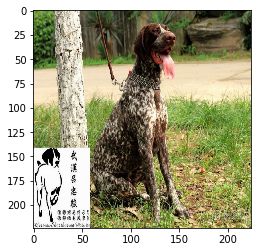

In [13]:
imshow(TrainH5['train_set_image'][0])

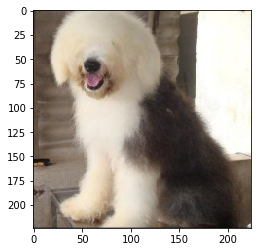

In [14]:
imshow(TestH5['test_set_image'][0])

In [15]:
TrainH5.close()
TestH5.close()